# analysis and cleaning

In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/data sceince/exam/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
df.size

10692

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
columns=df.columns
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.isnull().any()

,0
PassengerId,False
Survived,False
Pclass,False
Name,False
Sex,False
Age,True
SibSp,False
Parch,False
Ticket,False
Fare,False


In [9]:
for i in columns:
  print(df[i].value_counts(),i)
  print('*'*100)
  print(df[i].unique(),i)
  print('*'*100)

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64 PassengerId
****************************************************************************************************
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 18

In [10]:
dpl_rows=df.duplicated().sum()
dpl_rows

0

In [11]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [12]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [13]:
df['Cabin'].bfill(inplace=True)

<ipython-input-13-2e3880d25714>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].bfill(inplace=True)


In [14]:
df['Embarked'].ffill(inplace=True)

<ipython-input-14-8b8cb1606d66>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].ffill(inplace=True)


In [15]:
df['Cabin'].ffill(inplace=True)

In [16]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Name']=le.fit_transform(df['Name'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,male,22.000000,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,190,female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,353,female,26.000000,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,272,female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,15,male,35.000000,0,0,373450,8.0500,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,male,27.000000,0,0,211536,13.0000,B42,S
887,888,1,1,303,female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,413,female,29.699118,1,2,W./C. 6607,23.4500,C148,S
889,890,1,1,81,male,26.000000,0,0,111369,30.0000,C148,C


In [18]:
le2=LabelEncoder()
df['Ticket']=le2.fit_transform(df['Ticket'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,male,22.000000,1,0,523,7.2500,C85,S
1,2,1,1,190,female,38.000000,1,0,596,71.2833,C85,C
2,3,1,3,353,female,26.000000,0,0,669,7.9250,C123,S
3,4,1,1,272,female,35.000000,1,0,49,53.1000,C123,S
4,5,0,3,15,male,35.000000,0,0,472,8.0500,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,male,27.000000,0,0,101,13.0000,B42,S
887,888,1,1,303,female,19.000000,0,0,14,30.0000,B42,S
888,889,0,3,413,female,29.699118,1,2,675,23.4500,C148,S
889,890,1,1,81,male,26.000000,0,0,8,30.0000,C148,C


In [19]:
le3=LabelEncoder()
df['Cabin']=le3.fit_transform(df['Cabin'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,male,22.000000,1,0,523,7.2500,81,S
1,2,1,1,190,female,38.000000,1,0,596,71.2833,81,C
2,3,1,3,353,female,26.000000,0,0,669,7.9250,55,S
3,4,1,1,272,female,35.000000,1,0,49,53.1000,55,S
4,5,0,3,15,male,35.000000,0,0,472,8.0500,129,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,male,27.000000,0,0,101,13.0000,30,S
887,888,1,1,303,female,19.000000,0,0,14,30.0000,30,S
888,889,0,3,413,female,29.699118,1,2,675,23.4500,60,S
889,890,1,1,81,male,26.000000,0,0,8,30.0000,60,C


In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
encoder=OneHotEncoder(sparse_output=False)


In [22]:
encoded=encoder.fit_transform(df[['Sex']])

In [23]:
df1=pd.DataFrame(encoded,columns=['female','male'])
df1

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [24]:
df=pd.concat([df,df1],axis=1)

In [25]:
df.drop('Sex',axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,108,22.000000,1,0,523,7.2500,81,S,0.0,1.0
1,2,1,1,190,38.000000,1,0,596,71.2833,81,C,1.0,0.0
2,3,1,3,353,26.000000,0,0,669,7.9250,55,S,1.0,0.0
3,4,1,1,272,35.000000,1,0,49,53.1000,55,S,1.0,0.0
4,5,0,3,15,35.000000,0,0,472,8.0500,129,S,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,27.000000,0,0,101,13.0000,30,S,0.0,1.0
887,888,1,1,303,19.000000,0,0,14,30.0000,30,S,1.0,0.0
888,889,0,3,413,29.699118,1,2,675,23.4500,60,S,1.0,0.0
889,890,1,1,81,26.000000,0,0,8,30.0000,60,C,0.0,1.0


In [26]:
df['Embarked'].isna().sum()

0

In [27]:
df3=pd.get_dummies(df[['Embarked']])
df3.head()

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [28]:
df=pd.concat([df,df3],axis=1)

In [29]:
df.drop(['Embarked'],axis=1,inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    int64  
 10  female       891 non-null    float64
 11  male         891 non-null    float64
 12  Embarked_C   891 non-null    bool   
 13  Embarked_Q   891 non-null    bool   
 14  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(4), int64(8)
memory usage: 86.3 KB


In [31]:
corln=df.corr()['Survived']
corln

,Survived
PassengerId,-0.005007
Survived,1.000000
Pclass,-0.338481
Name,-0.057343
Age,-0.069809
SibSp,-0.035322
Parch,0.081629
Ticket,-0.164549
Fare,0.257307
Cabin,-0.009485


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


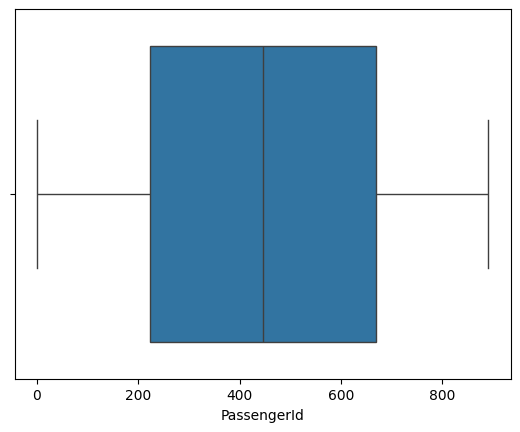

------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


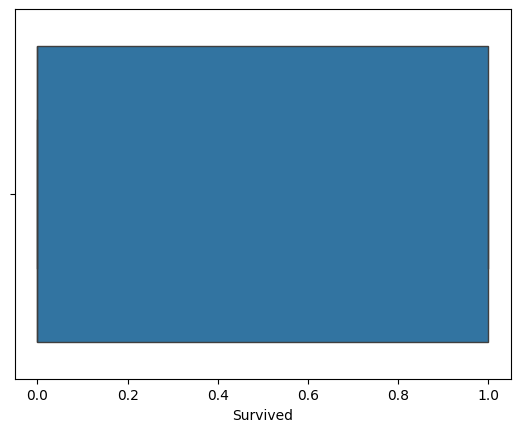

------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


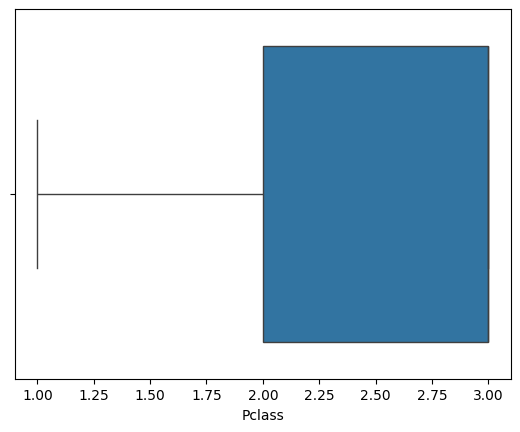

------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


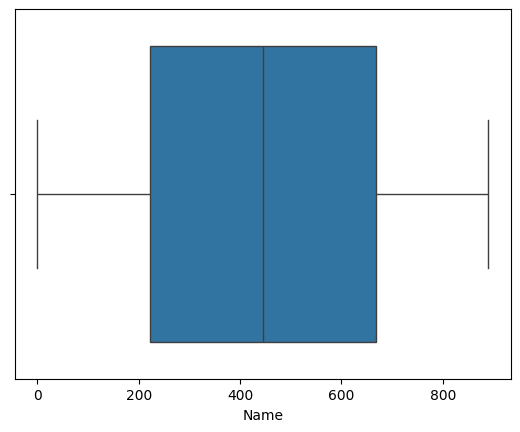

------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


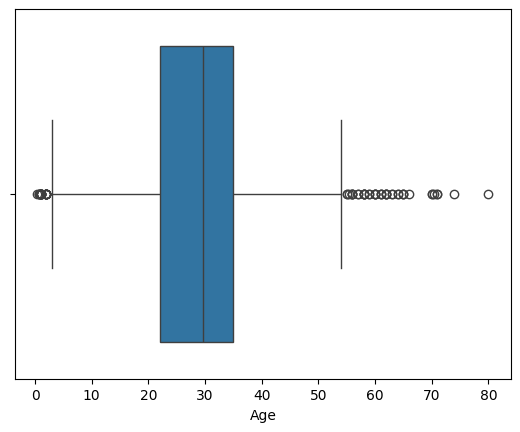

------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


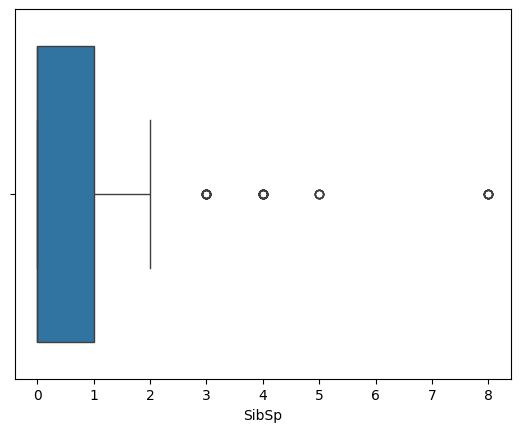

------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


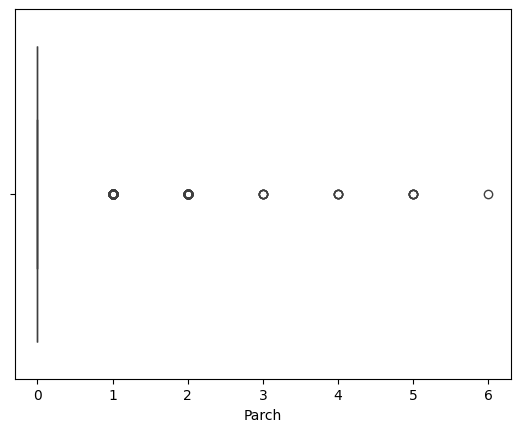

------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


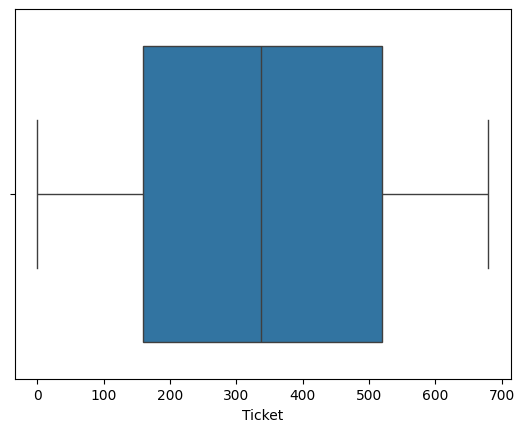

------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


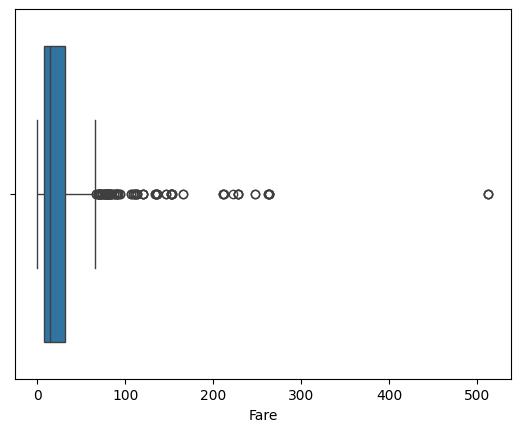

------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


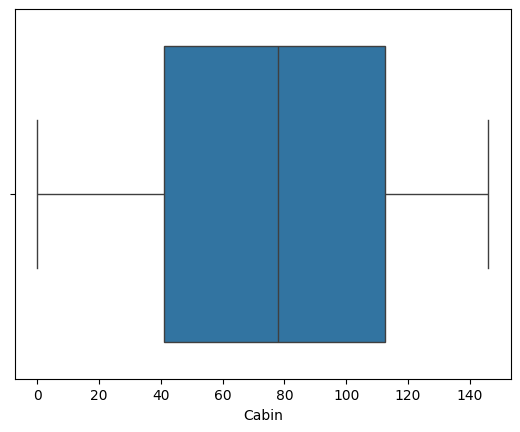

------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


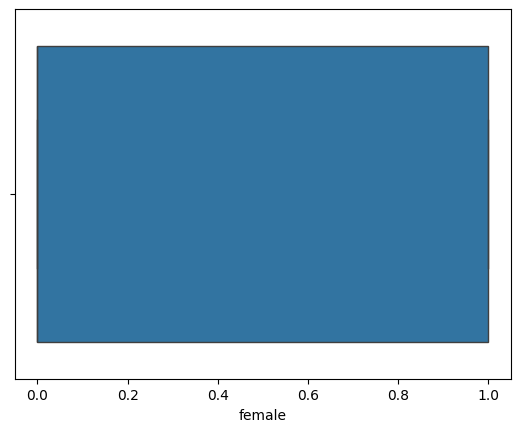

------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


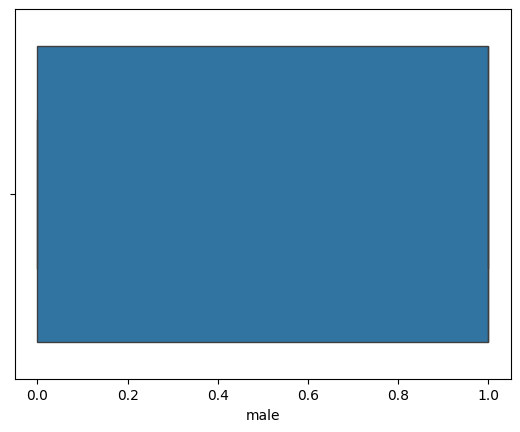

------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


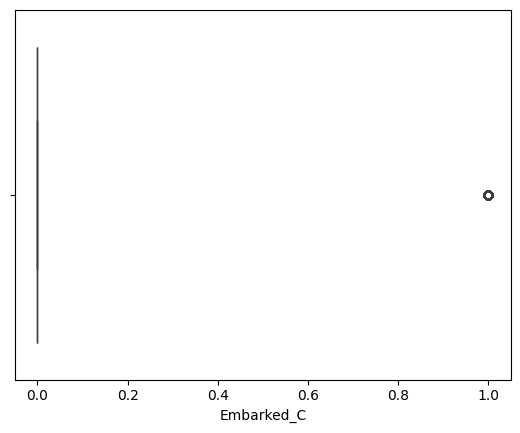

------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


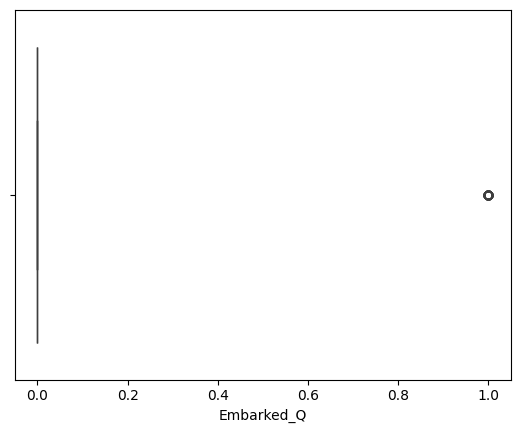

------------------------------


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


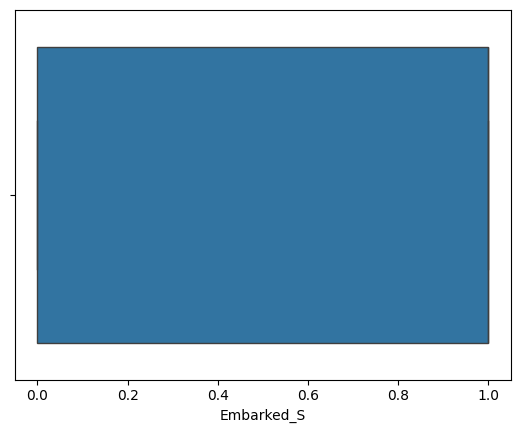

------------------------------


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in df.columns:
  sns.boxplot(x=df[i])
  plt.show()
  print('-' * 30)

In [77]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [78]:
df.duplicated().any()

False

In [33]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [34]:
x

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,108,22.000000,1,0,523,7.2500,81,0.0,1.0,False,False,True
1,2,1,190,38.000000,1,0,596,71.2833,81,1.0,0.0,True,False,False
2,3,3,353,26.000000,0,0,669,7.9250,55,1.0,0.0,False,False,True
3,4,1,272,35.000000,1,0,49,53.1000,55,1.0,0.0,False,False,True
4,5,3,15,35.000000,0,0,472,8.0500,129,0.0,1.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,27.000000,0,0,101,13.0000,30,0.0,1.0,False,False,True
887,888,1,303,19.000000,0,0,14,30.0000,30,1.0,0.0,False,False,True
888,889,3,413,29.699118,1,2,675,23.4500,60,1.0,0.0,False,False,True
889,890,1,81,26.000000,0,0,8,30.0000,60,0.0,1.0,True,False,False


In [35]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=2)

In [37]:
y.value_counts()

,count
Survived,
0,549
1,342


# standardize

In [38]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()

xtrain=sd.fit_transform(xtrain)

xtest=sd.fit_transform(xtest)

#visualize

In [39]:
age=df['Age']
c=df['Cabin']
s=df['Survived']
p=df['PassengerId']
t=df['Ticket']
pc=df['Pclass']
f=df['female']

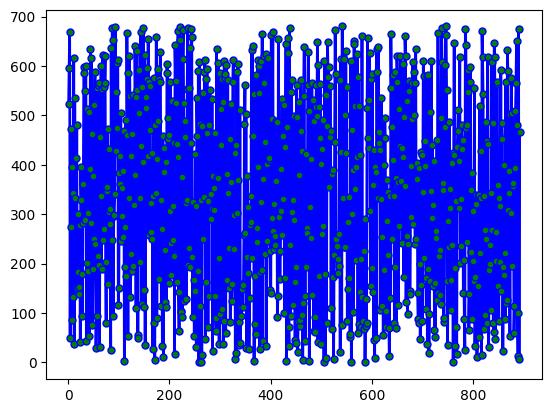

In [40]:
import matplotlib.pyplot as plt

plt.plot(p,t,color='b',linewidth=2,marker='o',markersize=5,markerfacecolor='g')
plt.show()

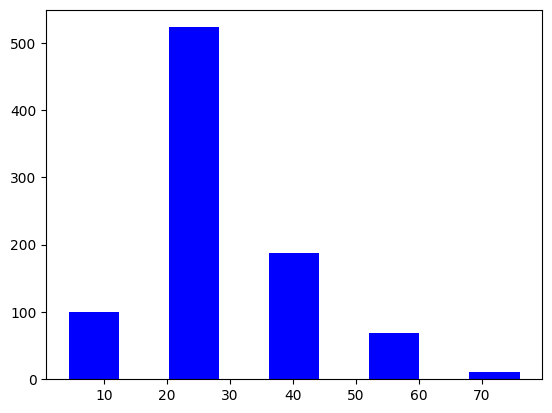

In [41]:
plt.hist(age,bins=5,color='b',rwidth=0.50)
plt.show()

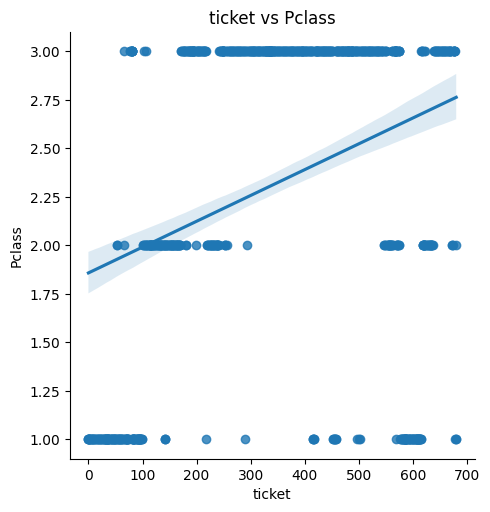

In [42]:
sns.lmplot(x='Ticket', y='Pclass', data=df)
plt.title('ticket vs Pclass')
plt.xlabel('ticket')
plt.ylabel('Pclass')
plt.show()

# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [44]:
ypred = knn.predict(xtest)
ypred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1])

In [45]:
training_score=knn.score(xtrain,ytrain)
training_score

0.8876404494382022

In [46]:
testing_score=knn.score(xtest,ytest)
testing_score

0.7988826815642458

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [48]:
accuracy_score(ytest,ypred)

0.7988826815642458

In [49]:
confusion_matrix(ytest,ypred)

array([[90, 10],
       [26, 53]])

In [50]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       100
           1       0.84      0.67      0.75        79

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=5,criterion='entropy')
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [52]:
y_pred=dt.predict(xtest)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0])

In [53]:
accuracy_score(ytest,y_pred)

0.7877094972067039

In [54]:
training_scor=dt.score(xtrain,ytrain)
training_scor

0.8595505617977528

In [55]:
testing_scor=dt.score(xtest,ytest)
testing_scor

0.7877094972067039

In [56]:
confusion_matrix(ytest,y_pred)

array([[93,  7],
       [31, 48]])

In [57]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       100
           1       0.87      0.61      0.72        79

    accuracy                           0.79       179
   macro avg       0.81      0.77      0.77       179
weighted avg       0.80      0.79      0.78       179



In [58]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'female', 'male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

[Text(0.4513888888888889, 0.9166666666666666, 'female <= -0.302\nentropy = 0.95\nsamples = 712\nvalue = [449, 263]\nclass = 0'),
 Text(0.2152777777777778, 0.75, 'Survived <= 0.238\nentropy = 0.845\nsamples = 253\nvalue = [69, 184]\nclass = 1'),
 Text(0.33333333333333337, 0.8333333333333333, 'True  '),
 Text(0.05555555555555555, 0.5833333333333334, 'Fare <= -0.33\nentropy = 0.324\nsamples = 135\nvalue = [8, 127]\nclass = 1'),
 Text(0.027777777777777776, 0.4166666666666667, 'entropy = 0.0\nsamples = 53\nvalue = [0, 53]\nclass = 1'),
 Text(0.08333333333333333, 0.4166666666666667, 'Fare <= -0.306\nentropy = 0.461\nsamples = 82\nvalue = [8, 74]\nclass = 1'),
 Text(0.05555555555555555, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.1111111111111111, 0.25, 'Ticket <= -0.071\nentropy = 0.384\nsamples = 80\nvalue = [6, 74]\nclass = 1'),
 Text(0.08333333333333333, 0.08333333333333333, 'entropy = 0.639\nsamples = 37\nvalue = [6, 31]\nclass = 1'),
 Text(0.1388888888888889,

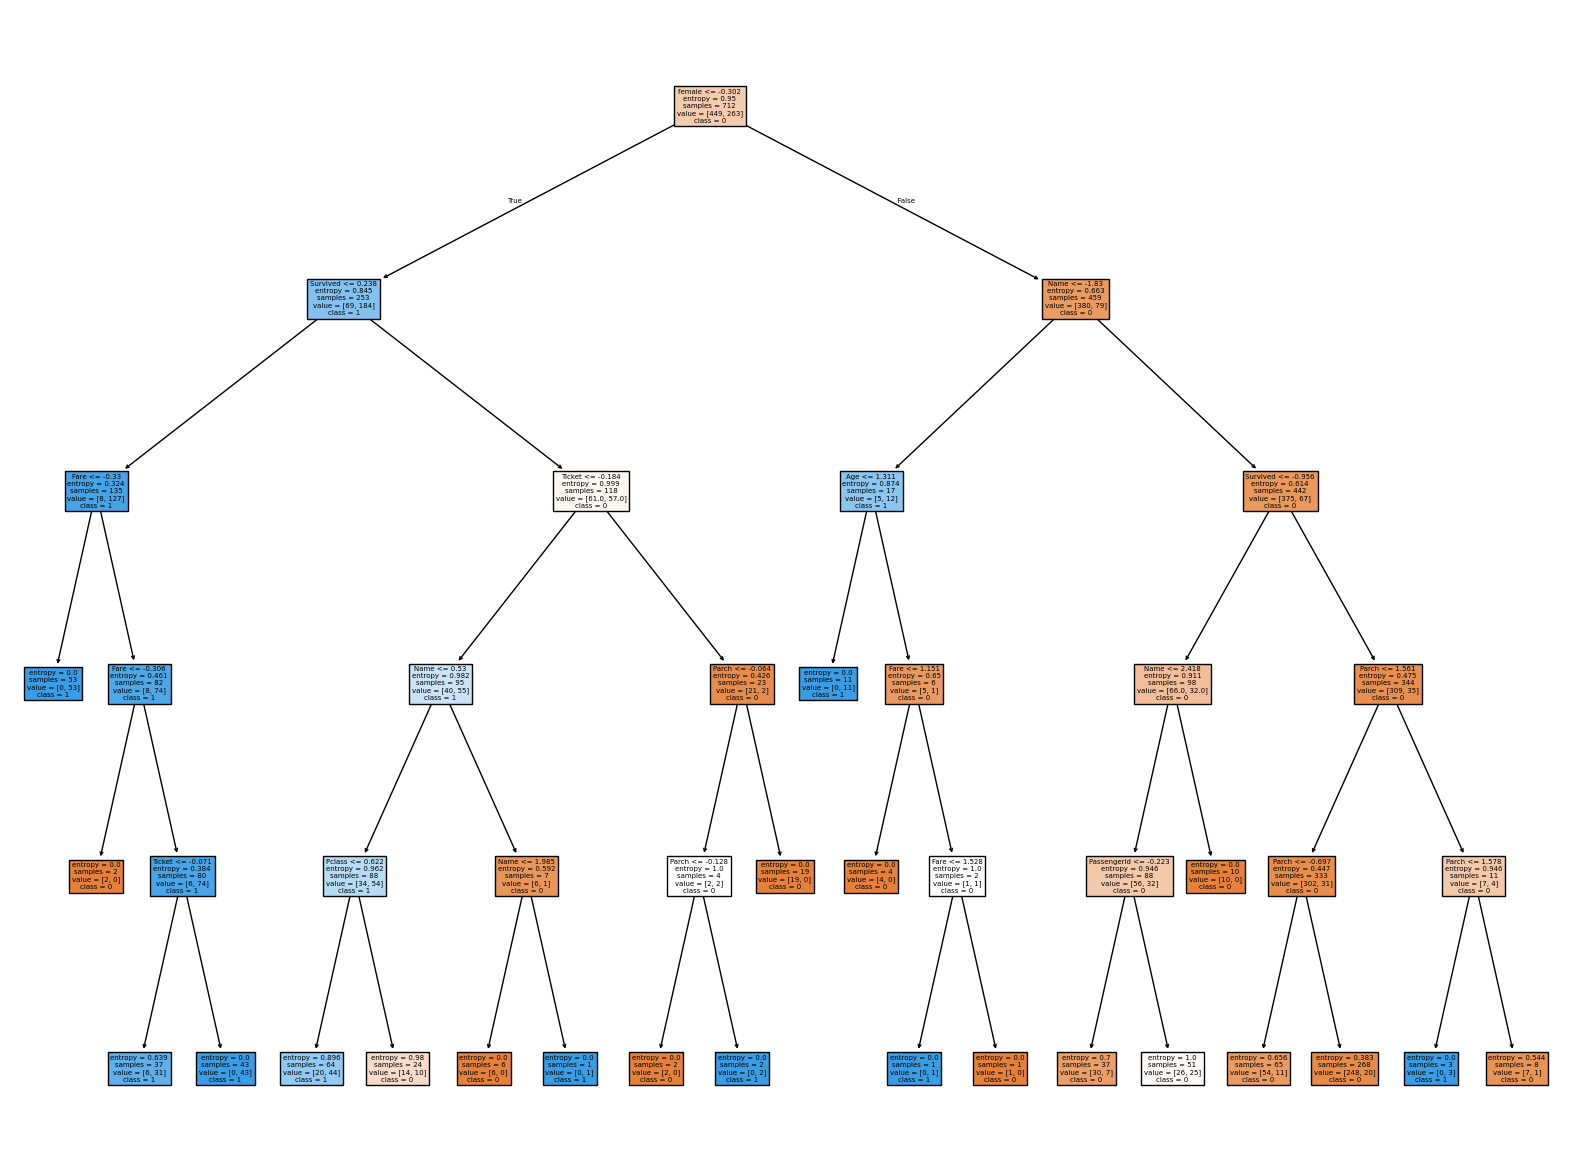

In [59]:
from sklearn import tree

plt.figure(figsize=(20,15))
tree.plot_tree(dt,feature_names=['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'female', 'male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],class_names=['0','1','2'],filled=True)

# logistic regression

In [60]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)
yprd=model.predict(xtest)
yprd

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0])

In [61]:
accuracy_score(ytest,yprd)

0.770949720670391

In [62]:
training_scr=model.score(xtrain,ytrain)
training_scr

0.8174157303370787

In [63]:
testing_scr=model.score(xtest,ytest)
testing_scr

0.770949720670391

In [64]:
confusion_matrix(ytest,yprd)

array([[88, 12],
       [29, 50]])

In [65]:
print(classification_report(ytest,yprd))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       100
           1       0.81      0.63      0.71        79

    accuracy                           0.77       179
   macro avg       0.78      0.76      0.76       179
weighted avg       0.78      0.77      0.77       179



# ensemble

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfc=RandomForestClassifier(n_estimators=51,criterion='gini',max_depth=4,max_features=2)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=4, max_features=2, n_estimators=51)

In [68]:
ypredd=rfc.predict(xtest)
ypredd

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0])

In [69]:
accuracy_score(ytest,ypredd)

0.7932960893854749

In [70]:
training_=rfc.score(xtrain,ytrain)
training_

0.8553370786516854

In [71]:
testing_=rfc.score(xtest,ytest)
testing_

0.7932960893854749

In [72]:
confusion_matrix(ytest,ypredd)

array([[94,  6],
       [31, 48]])

In [73]:
print(classification_report(ytest,ypredd))

              precision    recall  f1-score   support

           0       0.75      0.94      0.84       100
           1       0.89      0.61      0.72        79

    accuracy                           0.79       179
   macro avg       0.82      0.77      0.78       179
weighted avg       0.81      0.79      0.79       179



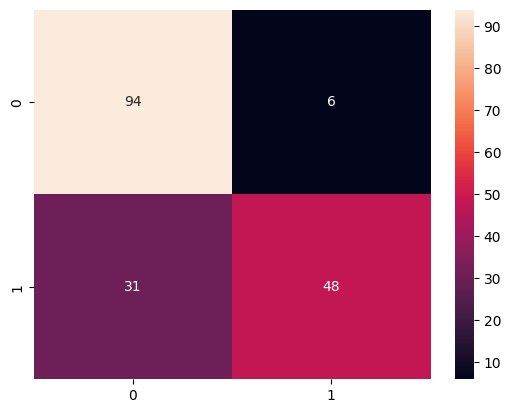

In [74]:
cm=confusion_matrix(ytest,ypredd)
sns.heatmap(cm,annot=True)
plt.show()

In [75]:
import pickle
pickle.dump(knn,open('knn.sav','wb'))

In [76]:
import pickle
pickle.dump(sd,open('sd1.sav','wb'))